# Проект "Спрос на рейсы авиакомпании"

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Описание проекта

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.


### Описание данных

query_1.csv — результат первого запроса.   
В нём содержится такая информация:
+ model — модель самолета;
+ flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

query_3.csv — результат третьего запроса.  
В нём содержится такая информация:
+ city — город;
+ average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.


## Содержание проекта

[1. Загрузка и проверка данных](#1)  
[2. Анализ данных](#2)  
[Общий вывод](#itog)  

# 1. Загрузка и проверка данных<a id="1"></a>

In [4]:
display(models)
display(models.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Типы данных в таблице корректны.

In [5]:
display(flights.head())
display(flights.info())
display(flights.describe())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Типы данных в таблице корректны.

### Вывод

Произведена загрузка данных. Данные проверены на корректность типов.

Выберем ТОП-10 городов по количеству рейсов

In [6]:
top10 = flights.sort_values('average_flights', ascending=False).head(10)
display(top10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


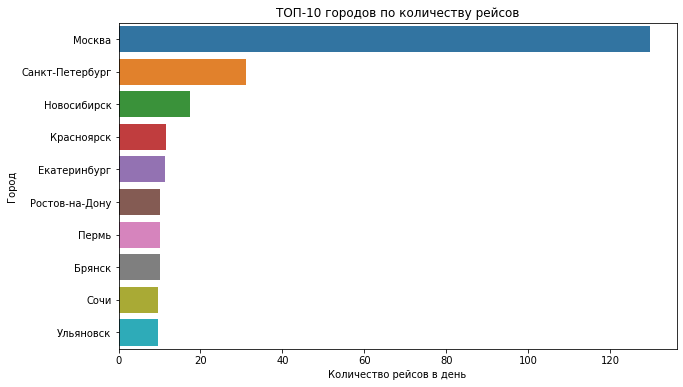

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(y='city', x='average_flights', data=top10)
plt.title('ТОП-10 городов по количеству рейсов')
plt.ylabel('Город')
plt.xlabel('Количество рейсов в день')
plt.show()

Получили ожидаемый результат, что максимальное количество рейсов происходит в города-миллионники.

Рассмотрим, каким образом распределяются рейсы в зависимости от модели самолета:

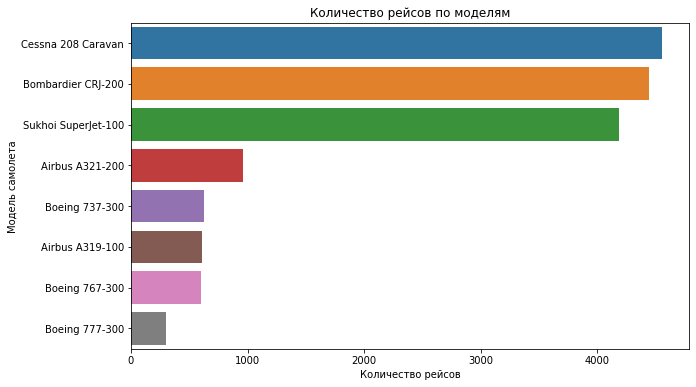

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(y='model', x='flights_amount', data=models.sort_values('flights_amount', ascending=False))
plt.title('Количество рейсов по моделям')
plt.ylabel('Модель самолета')
plt.xlabel('Количество рейсов')
plt.show()

Как видим, наибольшее число рейсов обеспечивают самолеты малой и ближнемагистральной авиации (cessna 208, CRJ-200, SSJ-100).  
Средне- и дальнемагистральные самолеты имеют в разы меньшее количество рейсов.

Аналогично, рассмотрим количество рейсов в разрезе городов.

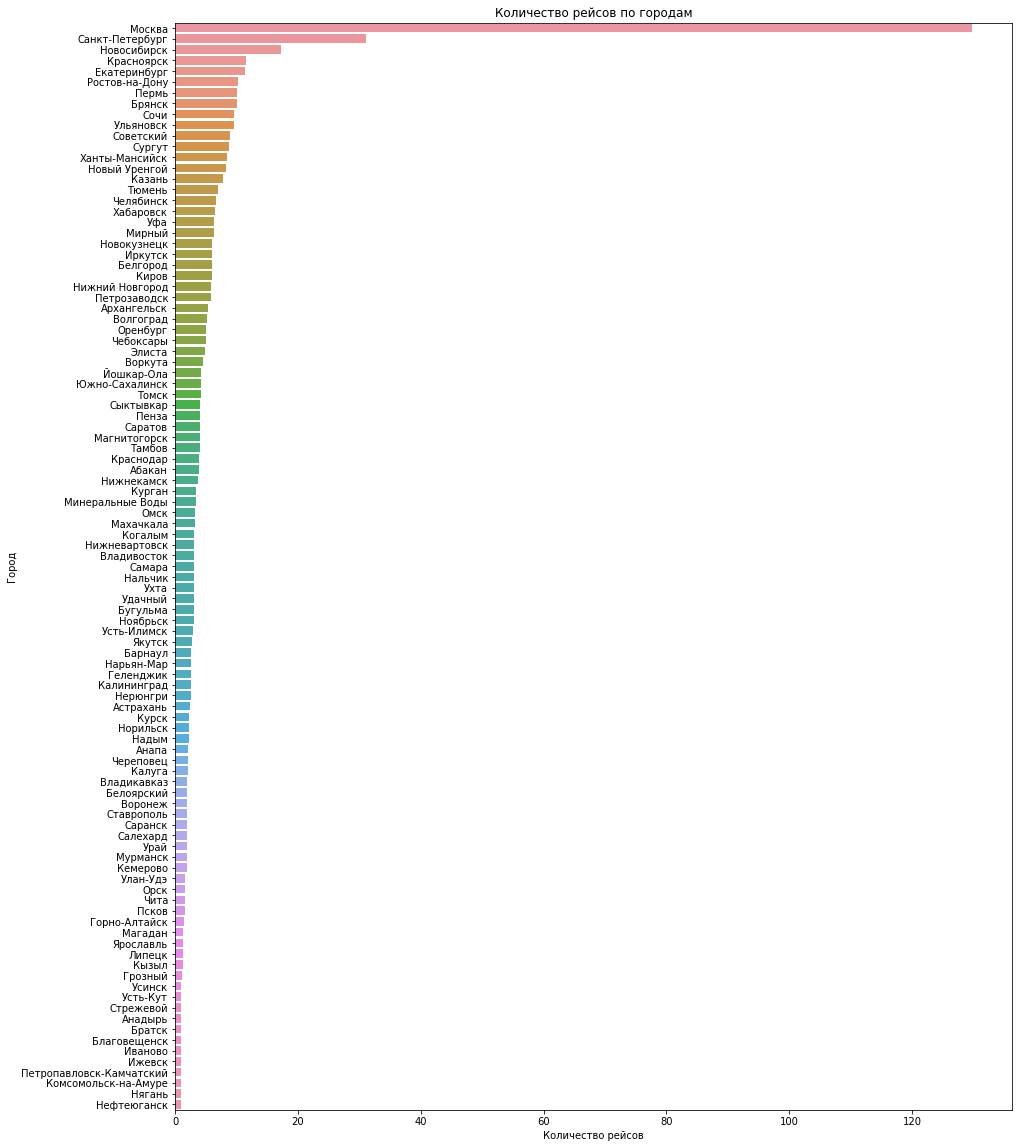

In [9]:
plt.figure(figsize=(15,20))
sns.barplot(y='city', x='average_flights', data=flights.sort_values('average_flights', ascending=False))
plt.title('Количество рейсов по городам')
plt.ylabel('Город')
plt.xlabel('Количество рейсов')
plt.show()

# Вывод<a id="itog"></a>

Из проведенного анализа можно сделать следующие выводы:  
    - Наибольшее количество рейсов приходится на города -миллионники (Москва, Санкт-Петербург, Новосибирск)
    - Наименьшее - в городах с населением до 250 тыс. чел (Комсомольск на Амуре, Нягань, Нефтеюганск)  
    
Анализируя, зависимость количества рейсов от модели самолета, видим, что наибольшее число рейсов обеспечивают самолеты малой и ближнемагистральной авиации (Сessna 208, CRJ-200, SSJ-100).  
Средне- и дальнемагистральные самолеты имеют в разы меньшее количество рейсов (A-319, Boeing-767, Boeing-777.
    